# **Linear Regression**


---



In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split as splt
from sklearn.metrics import mean_squared_error 

Part 01: Reading the Data 

In [ ]:
# Reading the data
data = pd.read_csv('/content/LR_Basics.csv')

In [ ]:
# Looking at the data 
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


Part 02: Visualizing the data

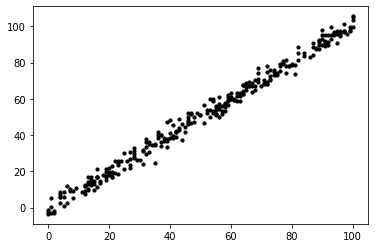

In [ ]:
x = data['x']
y = data['y']
plt.scatter(x,y,color='black',s=10)
plt.show()

Part 03: Dividing the data

In [ ]:
# Dividing the data
xtr,xte,ytr,yte = splt(x,y,test_size=0.2,random_state=1)

Part 04: Gradient descent

In [ ]:
# Function to display Linear Regression using GD
# Input: x test, y test, lr learniing rate
# Output: a value for W and b
def Linear_Reg_GD (x, y, lr = 0.002,epoch =100):
    idx = x.index
    w = 1
    b = 1
    m = sum(list(y))
    for i in range(epoch):
        J1 = J0 = 0
        for j in range(len(y)):
            a = x.iloc[j]
            c = y.iloc[j]
            y_hat = w*a + b
            #print('iusd',y_hat,c)
            J1 += a*(y_hat-c)
            J0 += (y_hat-c)
        w = w - J1*(lr/m)
        #print(w,b)
        b = b - J0*(lr/m)
    return w, b

In [ ]:
# Finding the coefficients
W,b  = Linear_Reg_GD(xtr,ytr)
print(W,b)

0.9914827561606401 0.9983178955566695


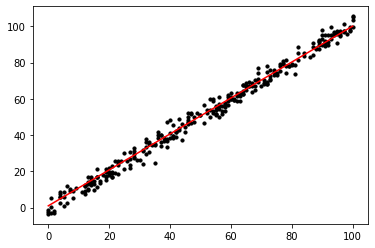

In [ ]:
# Visualizing the results:
x = data['x']
y = data['y']
plt.scatter(x,y,color='black',s=10)
x1 = np.linspace(0,100)
y1 = W*x1+b
plt.plot(x1,y1,'r')
plt.show()

Part 05: SGD

In [ ]:
# Defining a customized random function:
# Inputs: a lower bound, b upper bound, i = True whether integer, d = True whether decimal
# Output; A random number 
def randomnum (a, b, i = False, d = False, k = None):
    if i == True:
        return int(((random.randrange(0,10)/10)*(b-a))+a)
    else: return (((random.randrange(0,10**k)/10**k)*(b-a))+a)

In [ ]:
# Defining function that performs stochastic grad descent
# Input: a,b,lr,epoch
# Output: w and b
def Linear_Reg_SGD(x,y,lr=0.02,epoch=100):
    idx = x.index
    w,b = randomnum(0,10,d=True,k=2),randomnum(0,10,d=True,k=2)
    m = len(y)
    for i in range(epoch):
        j = randomnum(0,len(y)-1,i=True)
        a = x.iloc[j]
        c = y.iloc[j]
        y_hat = w*a + b
        J1 = a*(y_hat-c)
        J0 = (y_hat-c)
        w = w - J1*(lr/m)
        b = b - J0*(lr/m)
    return w,b

In [ ]:
# Finding the coefficients
W,b  = Linear_Reg_SGD(xtr,ytr)
print(W,b)

0.901306303642302 7.274455670329624


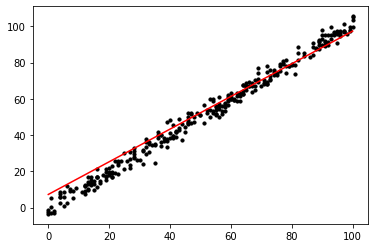

In [ ]:
# Visualizing the results:
x = data['x']
y = data['y']
plt.scatter(x,y,color='black',s=10)
x1 = np.linspace(0,100)
y1 = W*x1+b
plt.plot(x1,y1,'r')
plt.show()

Part 06: Mini Batch Gradient Descent

In [ ]:
# Defining a function that gives MBGD
# Input: x,y,mbs(minibatch size),lr,epoch
# Output: w and b
def Linear_Reg_MBGD (x, y, mbs = 5, lr = 0.002,epoch =100):
    idx = x.index
    w,b = randomnum(0,10,d=True,k=2),randomnum(0,10,d=True,k=2)
    m = sum(list(y))
    for i in range(epoch):
        J1 = J0 = 0
        for j in range(mbs):
            j = randomnum(0,len(y)-1,i=True)
            a = x.iloc[j]
            c = y.iloc[j]
            y_hat = w*a + b
            J1 += a*(y_hat-c)
            J0 += (y_hat-c)
        w = w - J1*(lr/m)
        b = b - J0*(lr/m)
    return w, b

In [ ]:
# Finding the coefficients
W,b  = Linear_Reg_MBGD(xtr,ytr,mbs=100)
print(W,b)

1.0085044846418947 1.0162075189651871


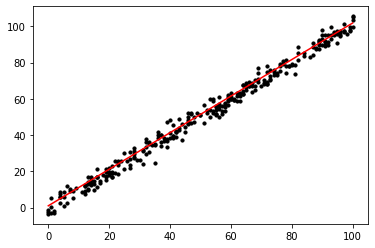

In [ ]:
# Visualizing the results:
x = data['x']
y = data['y']
plt.scatter(x,y,color='black',s=10)
x1 = np.linspace(0,100)
y1 = W*x1+b
plt.plot(x1,y1,'r')
plt.show()



---

